<a href="https://colab.research.google.com/github/zahraDehghanian97/stock_market/blob/master/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learing model in Keras
Implementation Steps:
 1- Data preparation (Train/Validation/Test)
 2- Crrating layers and model
 3- Setting training parameters (Loss & optimization function ,...)
 4- Train the model (using fit())


Creating Model

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
375/375 [==============================]

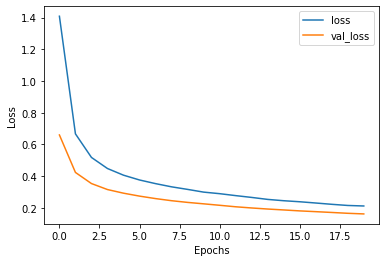

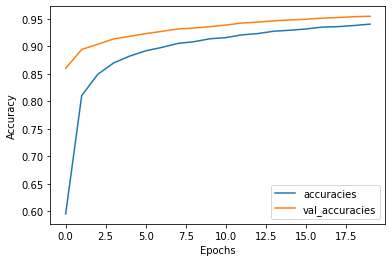

In [1]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

Y_train= np_utils.to_categorical(train_labels)
Y_test= np_utils.to_categorical(test_labels)

X_train=train_images.reshape(60000,784)
X_test=test_images.reshape(10000,784)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
# Fully Coneccted Model
myModel= Sequential()
myModel.add(Dense(500,activation='relu',input_shape=(784,)))
myModel.add(Dropout(0.2))
myModel.add(Dense(100,activation='relu'))
myModel.add(Dropout(0.2))
myModel.add(Dense(10,activation='softmax'))

myModel.summary()

myModel.compile(optimizer=SGD(lr=0.01),loss=categorical_crossentropy,metrics=['accuracy'])

network_history=myModel.fit(X_train,Y_train,batch_size=128,epochs=20,validation_split=0.2)

test_loss,test_accuracy=myModel.evaluate(X_test,Y_test)
test_label_p=myModel.predict(X_test,)
test_label_p=np.argmax(test_label_p,axis=1)

history=network_history.history

accuracies=history['accuracy']
val_loss= history['val_loss']
val_accuracy=history['val_accuracy']
losses=history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracy)
plt.legend(['accuracies','val_accuracies'])

Convelution Model

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1569

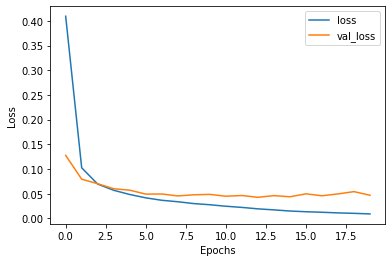

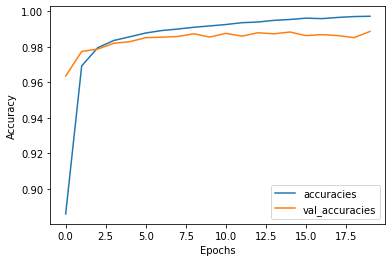

In [16]:
from keras.models import Model
from keras import layers 
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import keras
import numpy as np

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
X_train=train_images.reshape(60000,28,28,1)
X_test=test_images.reshape(10000,28,28,1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

myInput= layers.Input(shape=(28,28,1))
Conv1 =  layers.Conv2D(16,3, activation='relu' , padding='same')(myInput)
pool1 = layers.MaxPool2D(pool_size=2)(Conv1)
Conv2 =  layers.Conv2D(32,3, activation='relu' , padding='same')(pool1)
pool2 = layers.MaxPool2D(pool_size=2)(Conv2)
flat = layers.Flatten()(pool2)
out_layer = layers.Dense(10,activation='softmax')(flat)
myModel= Model(myInput,out_layer)
myModel.summary()
myModel.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

network_history=myModel.fit(X_train,Y_train,batch_size=128,epochs=20,validation_split=0.2)

test_loss,test_accuracy=myModel.evaluate(X_test,Y_test)
test_label_p=myModel.predict(X_test,)
test_label_p=np.argmax(test_label_p,axis=1)

history=network_history.history

accuracies=history['accuracy']
val_loss= history['val_loss']
val_accuracy=history['val_accuracy']
losses=history['loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(accuracies)
plt.plot(val_accuracy)
plt.legend(['accuracies','val_accuracies'])